<a href="https://colab.research.google.com/github/albanda/CE888/blob/master/lab4-recommender/rec_latent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Latent Factor Models for Collaborative Filtering

Load required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

Now load the data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/user_ratings.csv")

In [3]:
n_latent_factors = 2

user_ratings = data.values
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [4]:
latent_item_features

array([[0.089, 0.509],
       [0.365, 0.808],
       [0.578, 0.297],
       [0.713, 0.247],
       [0.617, 0.728]])

In [5]:
latent_user_preferences

array([[0.376, 0.994],
       [0.703, 0.45 ],
       [0.767, 0.784],
       [0.523, 0.026],
       [0.442, 0.516],
       [0.582, 0.914],
       [0.527, 0.5  ],
       [0.389, 0.992],
       [0.759, 0.162],
       [0.979, 0.207]])

In [6]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10000) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

Iteration 0/300000:	MSE=25.072962
Iteration 10000/300000:	MSE=1.438826
Iteration 20000/300000:	MSE=1.345351
Iteration 30000/300000:	MSE=1.315589
Iteration 40000/300000:	MSE=1.300487
Iteration 50000/300000:	MSE=1.291114
Iteration 60000/300000:	MSE=1.284605
Iteration 70000/300000:	MSE=1.279754
Iteration 80000/300000:	MSE=1.275960
Iteration 90000/300000:	MSE=1.272888
Iteration 100000/300000:	MSE=1.270337
Iteration 110000/300000:	MSE=1.268174
Iteration 120000/300000:	MSE=1.266311
Iteration 130000/300000:	MSE=1.264685
Iteration 140000/300000:	MSE=1.263251
Iteration 150000/300000:	MSE=1.261974
Iteration 160000/300000:	MSE=1.260828
Iteration 170000/300000:	MSE=1.259792
Iteration 180000/300000:	MSE=1.258851
Iteration 190000/300000:	MSE=1.257990
Iteration 200000/300000:	MSE=1.257200
Iteration 210000/300000:	MSE=1.256472
Iteration 220000/300000:	MSE=1.255798
Iteration 230000/300000:	MSE=1.255171
Iteration 240000/300000:	MSE=1.254587
Iteration 250000/300000:	MSE=1.254041
Iteration 260000/300000:	

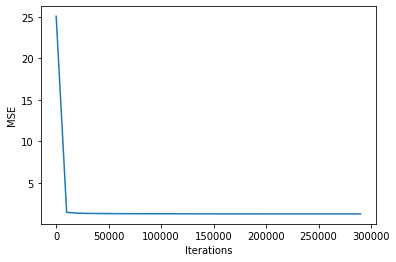

In [7]:
num_iter = 300000
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations
plt.figure()
plt.plot(np.arange(0, num_iter, 10000), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [8]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[  6.581,   1.509,  -7.419,   4.476,   6.048],
       [  4.142,   2.512,  42.748,   7.337,   5.39 ],
       [  7.622,   2.263,   7.041,   6.675,   7.527],
       [  9.222,   2.688,   7.005,   7.932,   9.057],
       [  5.239,   1.655,   7.858,   4.876,   5.274],
       [  2.572,   0.852,   5.071,   2.509,   2.63 ],
       [  5.471,   1.044, -12.537,   3.114,   4.815],
       [  8.116,   2.23 ,   2.039,   6.588,   7.833],
       [  2.36 ,   2.345,  52.074,   6.823,   3.997],
       [  3.431,   1.078,   4.968,   3.176,   3.448]])

In [9]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = data.columns

In [10]:
comparison_data
# For each data point, the number on the left is the original value from the dataset, the number on the right is the prediction

,The Call of Cthulhu,Frankenstein,Dracula,Neuromancer,Space Odyssey
0,"(8.0, 6.580622126989924)","(2.0, 1.5087991878690872)","(nan, -7.419414937784739)","(5.0, 4.476277605209128)","(4.0, 6.0477224244589465)"
1,"(3.0, 4.141545716075057)","(2.0, 2.5123176555336704)","(nan, 42.747904099861096)","(7.0, 7.337433540801491)","(7.0, 5.389913207785632)"
2,"(9.0, 7.622390875377635)","(nan, 2.262952386907363)","(7.0, 7.041331981459841)","(8.0, 6.675414642705086)","(5.0, 7.527351372133051)"
3,"(nan, 9.222337851035931)","(nan, 2.688040432051431)","(7.0, 7.004997785467656)","(8.0, 7.9322315607752705)","(9.0, 9.056770948590552)"
4,"(nan, 5.238724083494713)","(1.0, 1.6547827827612733)","(8.0, 7.858392099619303)","(3.0, 4.87568657717832)","(7.0, 5.274241170031257)"
5,"(2.0, 2.5720449057039296)","(3.0, 0.8524058900211053)","(5.0, 5.070720032995828)","(nan, 2.5093922982212904)","(nan, 2.6299805156456055)"
6,"(4.0, 5.470521957227738)","(2.0, 1.0443517624387448)","(nan, -12.537411781060145)","(2.0, 3.113954500852043)","(7.0, 4.814772372571286)"
7,"(7.0, 8.116369992723873)","(1.0, 2.229695370224474)","(2.0, 2.0387537211734466)","(7.0, 6.58762998470132)","(9.0, 7.832842763850656)"
8,"(3.0, 2.3596388570508426)","(3.0, 2.3449064458203046)","(nan, 52.07376557330671)","(7.0, 6.8228515486632775)","(3.0, 3.9966890892597062)"
9,"(4.0, 3.4311075398623276)","(nan, 1.077920267090169)","(5.0, 4.968407782259074)","(3.0, 3.1763238601793784)","(3.0, 3.4484090883604575)"
